In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv('Datasets/PTEN_MCF10A_predictions_ref_set_multi_copy.csv',
                index_col=False)
print(df.head(12))

   variant  MCF10A score  CADD  SNAP2  PolyPhen  SIFT  WT_RSA (%)  \
0      K6E        0.3311  26.6     67     0.155  0.99         NaN   
1      K6I        0.4544  27.3     64     0.244  1.00         NaN   
2     R15S        0.3870  25.0     65     0.123  1.00        53.3   
3     M35V        0.3606  25.0     44     0.914  1.00         0.0   
4     P38H        0.3521  26.1     44     1.000  1.00         0.0   
5     G44D        0.6232  26.0     65     0.968  1.00       117.5   
6     A79T        0.5711  23.0    -95     0.005  0.41        86.3   
7     D92N        0.2677  28.8     90     1.000  1.00        44.3   
8     H93Q        0.3301  26.1     77     1.000  1.00        74.5   
9     H93R        0.3930  27.0     83     0.998  0.97        74.5   
10   I101F        0.8803  26.0      6     0.998  1.00         0.2   
11   I101T        0.7138  29.0     44     0.998  1.00         0.2   

    WT_DEPTH (_)  WT_OSP  MT_RSA (%)  MT_DEPTH (_)  MT_OSP  ground truth  
0            NaN     NaN   

In [3]:
df['ground truth'].value_counts()

1.0    12
2.0     7
0.0     5
Name: ground truth, dtype: int64

# process data

In [4]:
training_df = df.drop(df.iloc[:,2:6], axis=1).copy()

In [5]:
training_df.dropna(inplace=True)

In [6]:
training_df.reset_index(drop=True)

,variant,MCF10A score,WT_RSA (%),WT_DEPTH (_),WT_OSP,MT_RSA (%),MT_DEPTH (_),MT_OSP,ground truth
0,A79T,0.5711,86.3,3.1,0.19,80.2,3.2,0.19,2.0
1,N117S,0.4916,25.3,4.0,0.51,10.1,4.0,0.53,1.0
2,H123Q,0.9934,0.0,11.0,0.60,0.0,11.4,0.64,1.0
3,H123Y,0.6383,0.0,11.0,0.60,0.0,12.1,0.58,1.0
4,C124S,0.8797,4.3,6.7,0.52,4.3,7.3,0.54,2.0
5,C124R,0.6986,4.3,6.7,0.52,8.1,5.8,0.48,2.0
6,A126D,0.5325,55.7,3.1,0.23,68.7,3.5,0.21,1.0
7,G127R,0.9753,0.0,5.2,0.49,0.0,8.3,0.74,2.0
8,G129R,0.8214,18.3,6.1,0.44,23.3,4.7,0.37,2.0
9,G129E,0.8841,18.3,6.1,0.44,4.5,7.3,0.61,2.0


In [60]:
#X = training_df.iloc[:, 1:-1]
#y = training_df.iloc[:, -1]

In [7]:
X = training_df[['MCF10A score']]
y = training_df.iloc[:, -1]

In [8]:
X.shape

(24, 1)

# Applying SVM

In [9]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [10]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.7, random_state=0)

/Users/jessesnaust/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
SVM = svm.SVC(gamma='scale', decision_function_shape='ovo')

# cross validation

In [12]:
# perform 5-fold cross validation

kfold_scores = cross_val_score(SVM, X, y, cv=5)
print(kfold_scores)

[0.66666667 0.83333333 1.         1.         1.        ]


In [13]:
print(np.mean(kfold_scores))

0.9


In [ ]:
# needs work
# cross_val_predict(SVM, X, y, cv=5)

In [14]:
SVM.fit(X_train, y_train) 
SVM_pred = SVM.predict(X_test)  

In [15]:
scores = accuracy_score(y_test, SVM_pred)

In [16]:
print(scores)

1.0


In [17]:
print(SVM_pred)

[2. 1. 0. 1. 0. 1. 1. 0.]


In [18]:
#X_all = df.iloc[:, 1:-1].dropna().reset_index(drop=True)
X_all = df[['MCF10A score']]

In [101]:
#X_all.drop(columns=['CADD','SNAP2','PolyPhen','SIFT'], inplace=True)

In [19]:
SVM_pred_all = SVM.predict(X_all)

In [20]:
print(SVM_pred_all)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 2. 2. 0. 1.]


In [21]:
len(SVM_pred_all)

47

In [22]:
df['SVM'] = SVM_pred_all

print(df.head(12))

   variant  MCF10A score  CADD  SNAP2  PolyPhen  SIFT  WT_RSA (%)  \
0      K6E        0.3311  26.6     67     0.155  0.99         NaN   
1      K6I        0.4544  27.3     64     0.244  1.00         NaN   
2     R15S        0.3870  25.0     65     0.123  1.00        53.3   
3     M35V        0.3606  25.0     44     0.914  1.00         0.0   
4     P38H        0.3521  26.1     44     1.000  1.00         0.0   
5     G44D        0.6232  26.0     65     0.968  1.00       117.5   
6     A79T        0.5711  23.0    -95     0.005  0.41        86.3   
7     D92N        0.2677  28.8     90     1.000  1.00        44.3   
8     H93Q        0.3301  26.1     77     1.000  1.00        74.5   
9     H93R        0.3930  27.0     83     0.998  0.97        74.5   
10   I101F        0.8803  26.0      6     0.998  1.00         0.2   
11   I101T        0.7138  29.0     44     0.998  1.00         0.2   

    WT_DEPTH (_)  WT_OSP  MT_RSA (%)  MT_DEPTH (_)  MT_OSP  ground truth  SVM  
0            NaN     N

In [23]:
# visualizing sVM classification

# now generate a new df to plot heatmap
df_class = df[['SVM']].transpose()
df_class.columns = df.iloc[:,0]

print(df_class)

variant  K6E  K6I  R15S  M35V  P38H  G44D  A79T  D92N  H93Q  H93R  ...  M198I  \
SVM      1.0  1.0   1.0   1.0   1.0   1.0   1.0   0.0   1.0   1.0  ...    0.0   

variant  N228S  T232A  P246L  N262S  D268E  D326N  K342N  P354Q  T382S  
SVM        0.0    1.0    1.0    0.0    0.0    2.0    2.0    0.0    1.0  

[1 rows x 47 columns]


In [27]:
# this will modify the range of the colormap by truncation
# https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

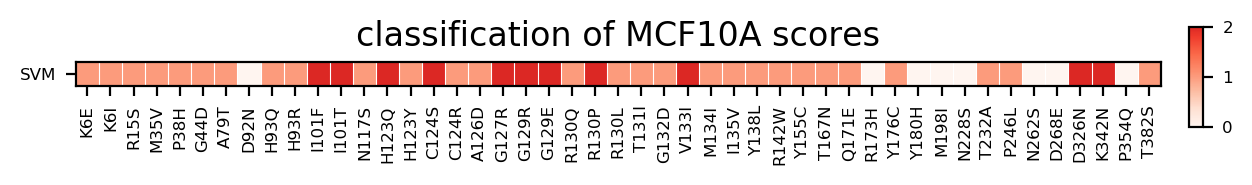

In [29]:
# specify custom colormap
#cmap = colors.ListedColormap(['green','red','black','yellow'])

# generating figure
fig = plt.figure(figsize=(7,5), dpi=200)
ax = fig.add_subplot(111)

# getting custom colors
cmap = plt.get_cmap('Reds') 
new_cmap = truncate_colormap(cmap, 0.0, 0.69)

#plotting
im = ax.imshow(df_class, cmap=new_cmap)
    
# set the ticks...
ax.set_xticks(np.arange(len(df_class.columns)))
ax.set_yticks(np.arange(1))
    
# label the ticks
ax.set_xticklabels(df_class.columns, fontsize=6, rotation=90)
ax.set_yticklabels(list(df_class.index), fontsize=6)
 
# set white grids
ax.set_xticks(np.arange(len(df_class.columns)+1)-0.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=0.4)
ax.tick_params(which="minor", bottom=False, left=False)
    
# set the title
ax.set_title('classification of MCF10A scores')

# add colorbar
cbar = ax.figure.colorbar(im, cax = fig.add_axes([0.92, 0.45, 0.01, 0.1]))
cbar.ax.tick_params(labelsize=6)

mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/MCF10A_classifications_SVM.pdf', transparent=True)

plt.show()

In [32]:
df.to_csv('Output Datasets/MCF10A scores_SVM_classification.csv', index=False)